<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-обзор-данных" data-toc-modified-id="Открытие-и-обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие и обзор данных</a></span></li><li><span><a href="#Проверка-расчётов-эффективности-обогащения" data-toc-modified-id="Проверка-расчётов-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчётов эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Прототип модели машинного обучения для компании "Цифра"  

**Цель проекта** - подготовка прототипа модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В ходе проекта выполним следующее:
1. Подготовим данные;
2. Проведем исследовательский анализ данных;
3. Построим и обучим модель, нужно спрогнозировать сразу две величины:  
 - эффективность обогащения чернового концентрата rougher.output.recovery;
 - эффективность обогащения финального концентрата final.output.recovery.  

**Описание данных:**  

Технологический процесс

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
 - Xanthate**— ксантогенат (промотер, или активатор флотации);
 - Sulphate — сульфат (на данном производстве сульфид натрия);
 - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи  


<font size=5>Наименование признаков</font>

Наименование признаков выглядит следующим образом:   

этап.тип_параметра.название_параметра

Пример: rougher.input.feed_ag

**Возможные значения для блока этап:**

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

**Возможные значения для блока тип_параметра:**

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import RandomState

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from catboost import Pool, cv
from sklearn.dummy import DummyRegressor


from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [3]:
sns.set(style="darkgrid")

In [4]:
SEED = 12345

## Подготовка данных

Необходимые данные находятся в трёх файлах - это исходные данные, обучающая и тестовая выборки. Загрузим их сделаем обзор.

### Открытие и обзор данных

In [5]:
# Загрузим датасеты с помощью конструкции обработки исключений
try:
    train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
    print('Прочитан файл с данными: train_df' )
    test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
    print('Прочитан файл с данными: test_df')
    full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')
    print('Прочитан файл с данными: full_df')
except:
    print(repr(err))

Прочитан файл с данными: train_df
Прочитан файл с данными: test_df
Прочитан файл с данными: full_df


In [6]:
#создам функцию для обзора датасетов
def info_df(data):
    display(data.head(10))
    data.info()
    print('Дубликаты:', data.duplicated().sum())
    return data

In [7]:
info_df(train_df)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [8]:
info_df(test_df)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

In [9]:
info_df(full_df)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

Итоги первичного осмотра:

- даты прочитаны правильно
- присутствуют только численные данные
- названия столбцов однотипны и корректны
- в данных есть попуски


In [10]:
print(train_df.shape)
print(test_df.shape)
print(full_df.shape)

(14149, 86)
(5290, 52)
(19439, 86)


In [11]:
print('Количество элементов в обучающих данных:', len(train_df))
print('Количество элементов в тестовых данных:', len(test_df))
print('Сумма элементов обучающих и тестовых данных:', len(train_df) + len(test_df))
print('Количество элементов в полных данных:', len(full_df))

Количество элементов в обучающих данных: 14149
Количество элементов в тестовых данных: 5290
Сумма элементов обучающих и тестовых данных: 19439
Количество элементов в полных данных: 19439


- Датасеты распределены верно.
В обучающей и полной выборках - по 86 столбцов, а в тестовом датасете - 52.

**Проверим соотношения данных**

In [12]:
print('Процент элементов обучающей выборки:', len(train_df)/len(full_df))
print('Процент элементов тестовой выборки:', len(test_df)/len(full_df))

Процент элементов обучающей выборки: 0.7278666598076032
Процент элементов тестовой выборки: 0.2721333401923967


In [13]:
train_df.shape[0] / test_df.shape[0]

2.6746691871455575

Данные разбиты в соотношении примерно 2.7:1 

### Проверка расчётов эффективности обогащения

- Проверим, что эффективность обогащения рассчитана правильно.
 - Вычислим recovery на обучающей выборке train_df для признака rougher.output.recovery (этап флотации).
 - Найдём MAE между расчётами и значением признака.

Формула выглядит так:  
<font color=green>
recovery = ((C * (F - T)) / (F * (C - T))) * 100%
</font>  
где:  

- C — доля золота в концентрате после флотации/очистки;  
- F — доля золота в сырье/концентрате до флотации/очистки;  
- T — доля золота в отвальных хвостах после флотации/очистки.  


**Признаками для проверки формулы являются:**
<font color=green>
- rougher.output.concentrate_au (С)
- rougher.input.feed_au (F)  
- rougher.output.tail_au (T) 
</font>    

А сам результат работы формулы находится здесь: 
<font color=green>
- rougher.output.recovery 
</font>  

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

Создадим копию обучающего датасета и удалим пропуски

In [14]:
recon_of_settlements = train_df.copy(deep=True)
recon_of_settlements.dropna(inplace=True)

In [15]:
C = recon_of_settlements['rougher.output.concentrate_au']
F = recon_of_settlements['rougher.input.feed_au']
T = recon_of_settlements['rougher.output.tail_au']

In [16]:
new_calc = ((C * (F - T)) / (F * (C - T))) * 100

In [17]:
recon_of_settlements['new_calc_recovery'] = new_calc

In [18]:
# Сделаем обзор результата
recon_of_settlements[['rougher.output.recovery', 'new_calc_recovery']].head(15)

,rougher.output.recovery,new_calc_recovery
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794
2016-01-15 05:00:00,88.156912,88.156912
2016-01-15 06:00:00,88.168065,88.168065
2016-01-15 07:00:00,87.668336,87.668336
2016-01-15 08:00:00,87.035862,87.035862


Посмотрим на распределения

<AxesSubplot:>

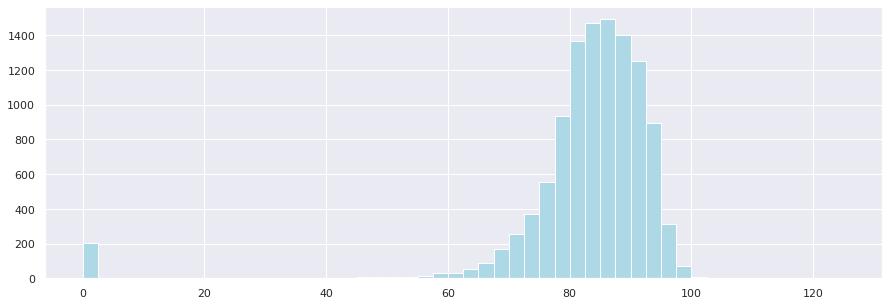

In [19]:
recon_of_settlements['rougher.output.recovery'].hist(color ='lightblue', bins=50, range=(0, 125), figsize=(15,5))

<AxesSubplot:>

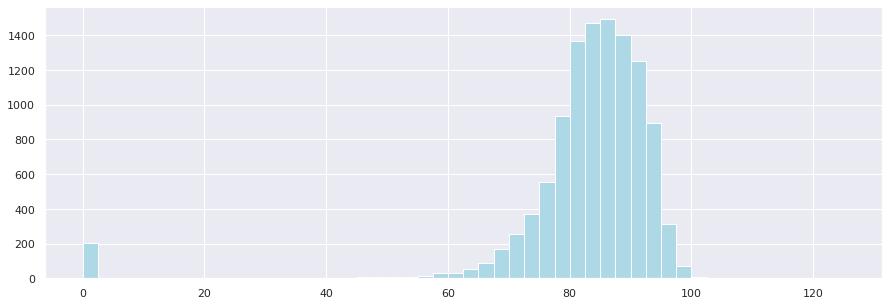

In [20]:
recon_of_settlements['new_calc_recovery'].hist(color ='lightblue', bins=50, range=(0, 125), figsize=(15,5))

На графиках нет различия в распределении старых и новых данных.

In [21]:
mean_absolute_error(recon_of_settlements['rougher.output.recovery'], recon_of_settlements['new_calc_recovery'])

9.82970122149377e-15

Среднее абсолютное отклонение ничтожно мало. Различий между данными действительно нет, рассчеты верны.

### Анализ признаков недоступных в тестовой выборке

In [22]:
diff_cols = train_df.columns.drop(test_df.columns)
print('Разница в количестве столбцов:', len(diff_cols))
train_df[diff_cols].info()

Разница в количестве столбцов: 34
<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.ta



- В список  столбцов входят стобцы с параметрами продукта и расчетными характеристиками (output, calculation).
В тестовой выборке отсутствуют данные по содержанию полезных ископаемых на всех этапах очистки руды в концентрате и в отвальных хвостах.
Также отсутствуют расчётные признаки на этапе флотации rougher.calculation (концентрация сульфатов относительно Au - золота, соотношение золота и Pb - свинца, и др.).

*Данные типы параметров получаются после выполнения части этапов техпроцесса.*

### Предобработка данных

Удалим дифферинцированные данные и из обучающей выборки, убрав перед этим из списка названия столбцов с целевым признаком.

In [23]:
cols_drop = diff_cols.drop(['final.output.recovery', 'rougher.output.recovery'])
cols_true = train_df.columns.drop(cols_drop)
train_df = train_df[cols_true]

In [24]:
train_df.shape

(14149, 54)

**Добавление целевого признака** 

Добавим в тестовые данные столбцы с целевыми признаками

In [25]:
test_df[['final.output.recovery', 'rougher.output.recovery']]\
= full_df.loc[test_df.index, ['final.output.recovery', 'rougher.output.recovery']]

In [26]:
test_df.shape

(5290, 54)

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       14149 non-null  float64
 1   primary_cleaner.input.sulfate               14129 non-null  float64
 2   primary_cleaner.input.depressant            14117 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14049 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14147 non-nu

In [29]:
test_df['final.output.recovery'].isnull().value_counts()

False    5290
Name: final.output.recovery, dtype: int64

In [30]:
train_df['final.output.recovery'].isnull().value_counts()

False    14149
Name: final.output.recovery, dtype: int64

<font color='purple'><b>Ниже посмотрел на пропуски</b></font>

<AxesSubplot:ylabel='date'>

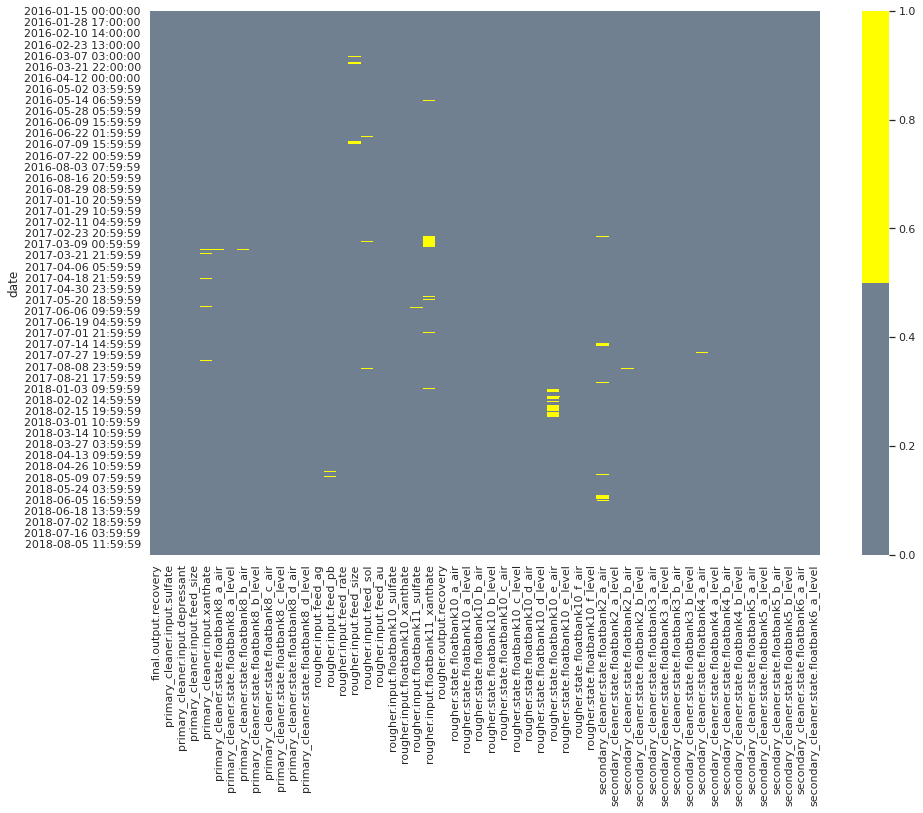

In [31]:
# посмотрим есть ли пропуски в обучающем датаферйме с помощью хитмэп
# определяем цвета 
# желтый - пропущенные данные, серый - не пропущенные
colours = ['#708090', '#FFFF00'] 
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(train_df.isnull(), cmap=sns.color_palette(colours))

In [32]:
train_df.isnull().sum().sum()

1705

In [33]:
for col in train_df.columns:
    pct_missing = np.mean(train_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

final.output.recovery - 0%
primary_cleaner.input.sulfate - 0%
primary_cleaner.input.depressant - 0%
primary_cleaner.input.feed_size - 0%
primary_cleaner.input.xanthate - 1%
primary_cleaner.state.floatbank8_a_air - 0%
primary_cleaner.state.floatbank8_a_level - 0%
primary_cleaner.state.floatbank8_b_air - 0%
primary_cleaner.state.floatbank8_b_level - 0%
primary_cleaner.state.floatbank8_c_air - 0%
primary_cleaner.state.floatbank8_c_level - 0%
primary_cleaner.state.floatbank8_d_air - 0%
primary_cleaner.state.floatbank8_d_level - 0%
rougher.input.feed_ag - 0%
rougher.input.feed_pb - 1%
rougher.input.feed_rate - 0%
rougher.input.feed_size - 1%
rougher.input.feed_sol - 1%
rougher.input.feed_au - 0%
rougher.input.floatbank10_sulfate - 0%
rougher.input.floatbank10_xanthate - 0%
rougher.input.floatbank11_sulfate - 0%
rougher.input.floatbank11_xanthate - 3%
rougher.output.recovery - 0%
rougher.state.floatbank10_a_air - 0%
rougher.state.floatbank10_a_level - 0%
rougher.state.floatbank10_b_air - 0%


**Обработка пропусков в данных**  

В данных есть пропуски. Восстановим данные по соседним, так как на это указано в условии задания.

In [34]:
# Заменим в обучающей выборки пропуски соседними данными. Согласно условиями задачи - соседние по времени параметры часто похожи.
print(train_df.shape)
train_df.fillna(method='ffill', inplace=True) 
print(train_df.shape)

(14149, 54)
(14149, 54)


In [35]:
train_df.isnull().sum().sum()

0

In [36]:
# Заменим пропуски в тестовой выборке на данные из соседних объектов.
print(test_df.shape)
test_df.fillna(method='ffill', inplace=True) 
print(test_df.shape)

(5290, 54)
(5290, 54)


In [37]:
test_df.isnull().sum().sum()

0

Заполним также пропуски  в полном наборе данных

<AxesSubplot:ylabel='date'>

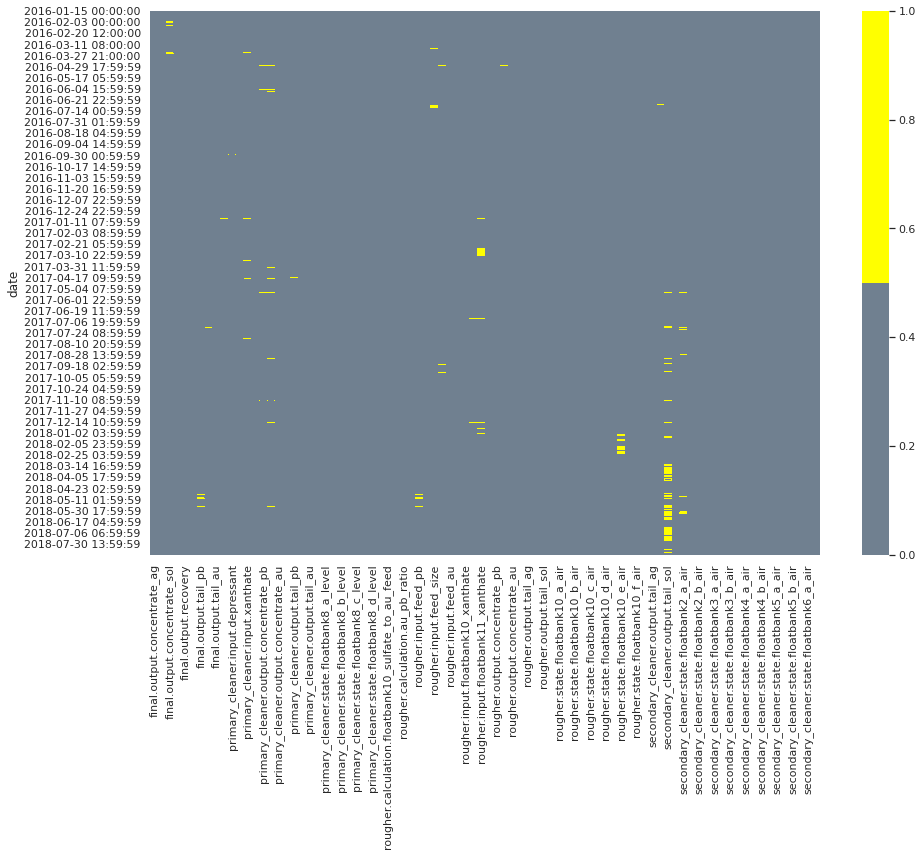

In [38]:
# посмотрим на пропуски
colours = ['#708090', '#FFFF00'] 
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(full_df.isnull(), cmap=sns.color_palette(colours))

In [39]:
full_df.isnull().sum().sum()

4481

In [40]:
print(full_df.shape)
full_df.fillna(method='ffill', inplace=True) 
print(full_df.shape)

(19439, 86)
(19439, 86)


In [41]:
full_df.isnull().sum().sum()

0

<font color='purple'><b>Пропуски заполнил похожими данными</b></font>





<div class="alert alert-block alert-warning">
    <font size=4>Вывод</font> 
    
- изучили производственный процесс добычи золота
- загрузили и изучили данные
    - проверили наименования колонок, все в нижнем регистре
    - проверили данные на дубликаты
    - проконтролировали размеры датафреймов
    - посмотрели на соотношение обучающих и тестовых данных
- проверили рассчет эффективности обогащения на обучающей выбрке, расчита верно.
    - проверили распределение старых и новых рассчетов, распределение совпадает
- посмотрели на отсутствующие в тестовой выборке данные
- добавили в тестовую выборку целевые признаки
- заполнили пропуски в датасетах
</div>

## Анализ данных

### Изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Пишем функции построения графиков

In [42]:
def draw_hist (data, title):
    fig, ax = plt.subplots( figsize=(16, 6))
    ax.set_ylabel('Кол-во наблюдений')
    ax.set_xlabel('Концентрация металла')
    ax.set_title(title)
    for col in data:
        data[col].hist(alpha=.4) 
        ax.legend(['Исходное сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

In [43]:
def draw_box(data, title):
    plt.figure(figsize=(16,6))
    boxplot = sns.boxplot(data=data)
    boxplot.axes.set_title('Концентрация ' + title + ' на разных стадиях очистки', fontsize=16)
    plt.show()

In [44]:
au_df = (full_df[[
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au']].copy())

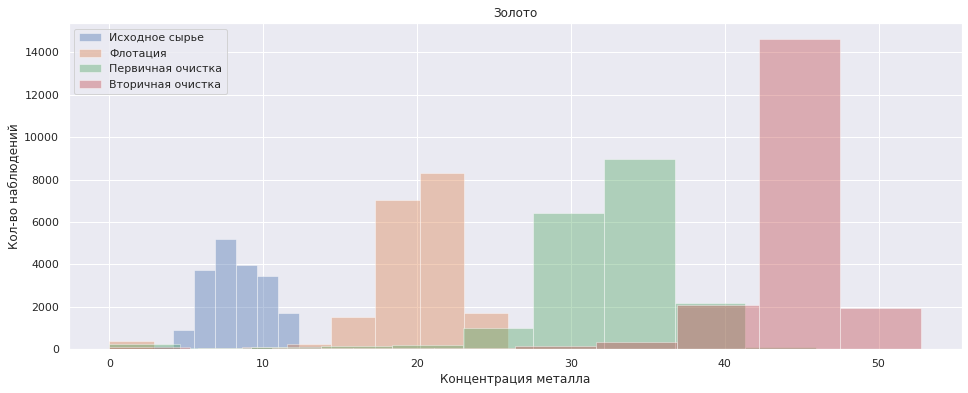

In [45]:
draw_hist(au_df,'Золото')

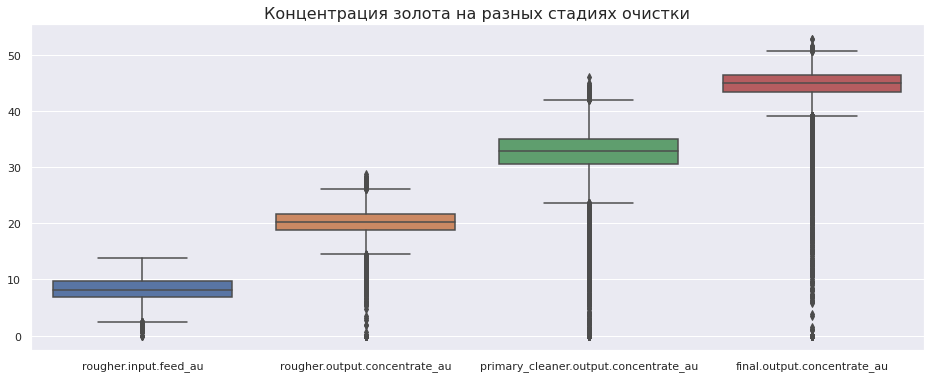

In [46]:
draw_box(au_df,'золота')

Концентрация золота с каждым этапом очистки увеличивается. График показывает что добыча идет по технологическому процессу.

In [47]:
ag_df = (full_df[[
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag']].copy())

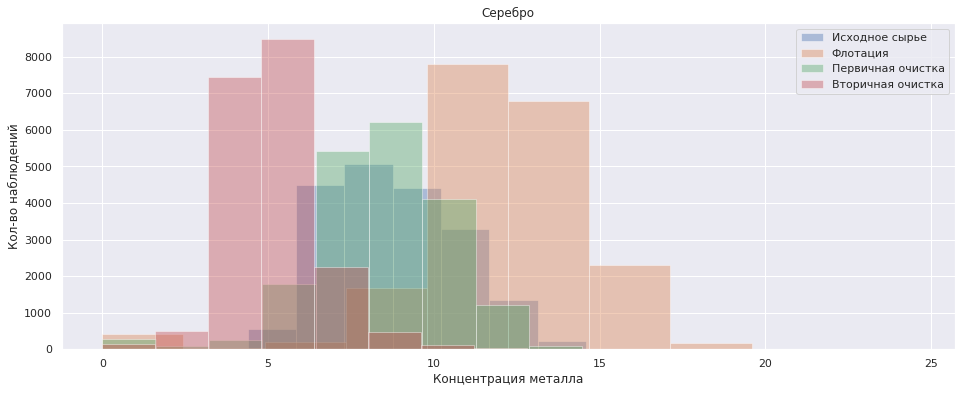

In [48]:
draw_hist(ag_df,'Серебро')

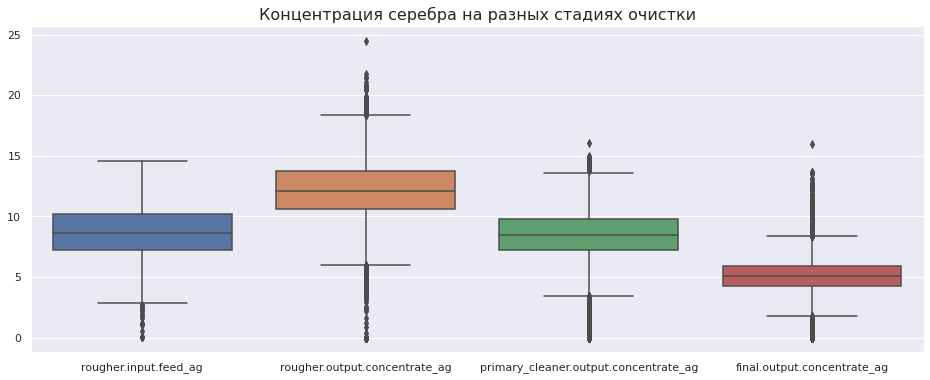

In [49]:
draw_box(ag_df,'серебра')

Концентрация серебра уменьшается с каждым этапом очистки.

In [50]:
pb_df = (full_df[[
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb']].copy())

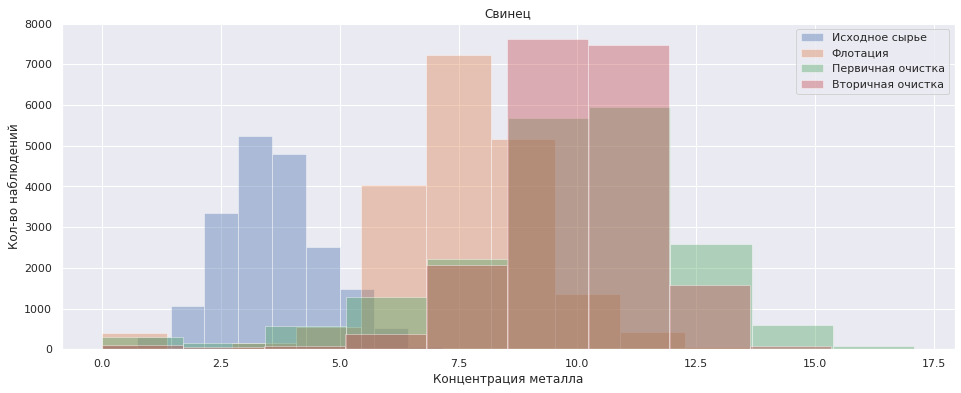

In [51]:
draw_hist(pb_df,'Свинец')

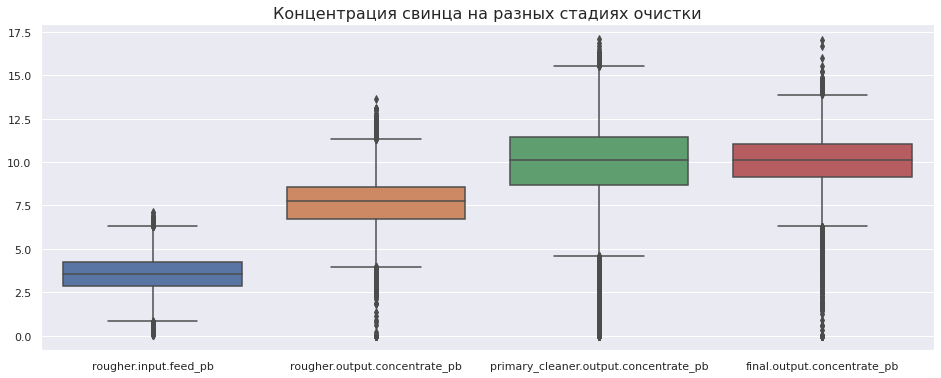

In [52]:
draw_box(pb_df,'свинца')

Концентрация свинца увеличивается по мере технологического процесса.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

**Проверим распределение гранул исхдного сырья**

In [53]:

feed_size_train = train_df['rougher.input.feed_size']
feed_size_test = test_df['rougher.input.feed_size']
feed_size = pd.concat([feed_size_train, feed_size_test], axis=1)

In [54]:
feed_size.columns=['train', 'test']

<AxesSubplot:ylabel='Frequency'>

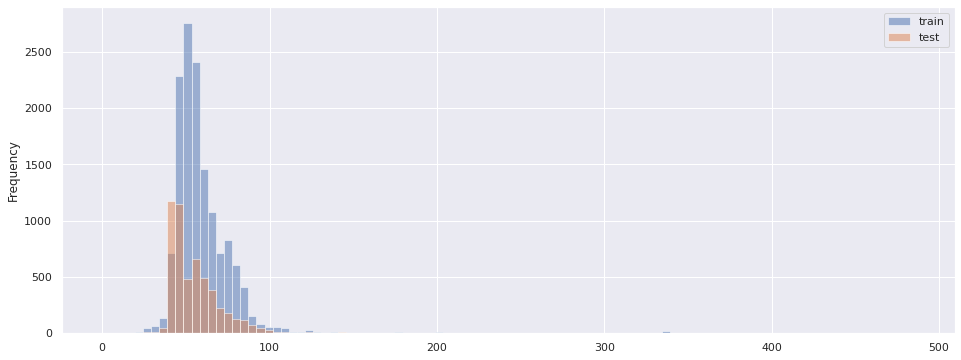

In [55]:
# Визуализируем распределения размеров гранул исходного сырья
feed_size.plot.hist(bins=100, alpha=0.5, figsize=(16, 6))


**Расределение размеров гранул после первой очистки**

In [56]:
feed_size_train = train_df['primary_cleaner.input.feed_size']
feed_size_test = test_df['primary_cleaner.input.feed_size']
feed_size = pd.concat([feed_size_train, feed_size_test], axis=1)

In [57]:
feed_size.columns=['train', 'test']

<AxesSubplot:ylabel='Frequency'>

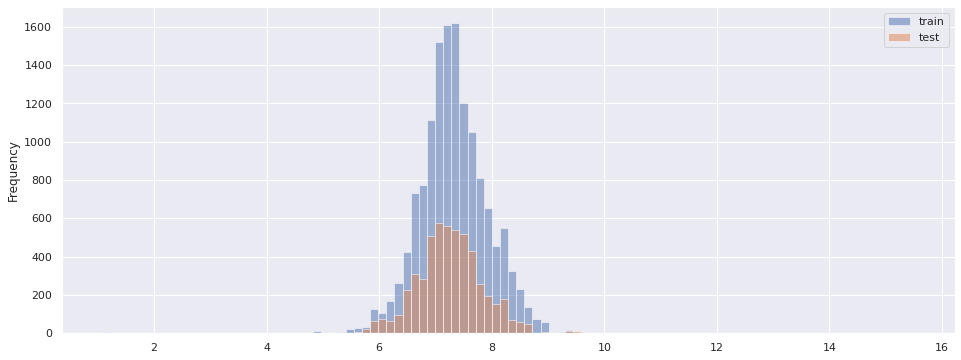

In [58]:
feed_size.plot.hist(bins=100, alpha=0.5, figsize=(16, 6))

Распределения за небольшими погрешностями совпадают. Неточности не должны критично повлиять на работу модели.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [59]:
# Делаем новый датасет с данныим о концентрации веществ и просуммируем их концентрацию на разных стадиях

conc_df = full_df[['rougher.input.feed_ag',
                   'rougher.input.feed_pb',
                   'rougher.input.feed_sol',
                   'rougher.input.feed_au', 
                   'rougher.output.concentrate_ag',
                   'rougher.output.concentrate_pb',
                   'rougher.output.concentrate_sol',
                   'rougher.output.concentrate_au',
                   'primary_cleaner.output.concentrate_ag', 
                   'primary_cleaner.output.concentrate_pb', 
                   'primary_cleaner.output.concentrate_sol', 
                   'primary_cleaner.output.concentrate_au', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_pb', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].copy()
conc_df['conc_sum_rougher_i'] = conc_df['rougher.input.feed_ag']\
                + conc_df['rougher.input.feed_pb']\
                + conc_df['rougher.input.feed_sol']\
                + conc_df['rougher.input.feed_au']
conc_df['conc_sum_rougher_o'] = conc_df['rougher.output.concentrate_ag']\
                + conc_df['rougher.output.concentrate_pb']\
                + conc_df['rougher.output.concentrate_sol']\
                + conc_df['rougher.output.concentrate_au']
conc_df['conc_sum_primary'] = conc_df['primary_cleaner.output.concentrate_ag']\
                + conc_df['primary_cleaner.output.concentrate_pb']\
                + conc_df['primary_cleaner.output.concentrate_sol']\
                + conc_df['primary_cleaner.output.concentrate_au']
conc_df['conc_sum_final'] = conc_df['final.output.concentrate_ag']\
                + conc_df['final.output.concentrate_pb']\
                + conc_df['final.output.concentrate_sol']\
                + conc_df['final.output.concentrate_au']

In [60]:
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   rougher.input.feed_ag                   19439 non-null  float64
 1   rougher.input.feed_pb                   19439 non-null  float64
 2   rougher.input.feed_sol                  19439 non-null  float64
 3   rougher.input.feed_au                   19439 non-null  float64
 4   rougher.output.concentrate_ag           19439 non-null  float64
 5   rougher.output.concentrate_pb           19439 non-null  float64
 6   rougher.output.concentrate_sol          19439 non-null  float64
 7   rougher.output.concentrate_au           19439 non-null  float64
 8   primary_cleaner.output.concentrate_ag   19439 non-null  float64
 9   primary_cleaner.output.concentrate_pb   19439 non-null  float64
 10  primary_cleaner.output.concentr

In [61]:
conc_df.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,conc_sum_rougher_i,conc_sum_rougher_o,conc_sum_primary,conc_sum_final
date,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,36.808594,6.486150,11.500771,7.101074,28.029297,19.793808,8.547551,10.389648,19.529297,34.174427,6.055403,9.889648,5.507324,42.192020,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,6.161113,2.266033,35.753385,6.478583,11.615865,7.278807,28.067063,20.050975,8.558743,10.497069,19.369147,34.118526,6.029369,9.968944,5.257781,42.701629,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,6.116455,2.159622,35.971630,6.362222,11.695753,7.216833,27.454037,19.737170,8.603505,10.354494,19.167579,33.969464,6.055926,10.213995,5.383759,42.657501,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,6.043309,2.037807,36.862241,6.118189,11.915047,7.175616,27.341277,19.320810,7.221879,8.496563,15.978538,28.260743,6.047977,9.977019,4.858634,42.689819,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,6.060915,1.786875,34.347666,5.663707,12.411054,7.240205,27.041023,19.216101,9.089428,9.986786,19.199864,33.044932,6.148599,10.142511,4.939416,42.774141,47.859163,65.908382,71.321010,64.004667


In [62]:
conc_df[['conc_sum_rougher_i', 'conc_sum_rougher_o', 'conc_sum_primary', 'conc_sum_final' ]].describe().T

,count,mean,std,min,25%,50%,75%,max
conc_sum_rougher_i,19439.0,57.320789,7.212680,0.04,53.557679,57.594391,61.953459,76.978947
conc_sum_rougher_o,19439.0,68.170865,12.491279,0.00,66.012495,70.181495,74.356904,88.140119
conc_sum_primary,19439.0,60.764731,10.017271,0.00,58.929364,62.497674,65.667336,80.749343
conc_sum_final,19439.0,68.653624,7.427536,0.00,67.932362,69.598444,71.368472,80.210644


<AxesSubplot:ylabel='Frequency'>

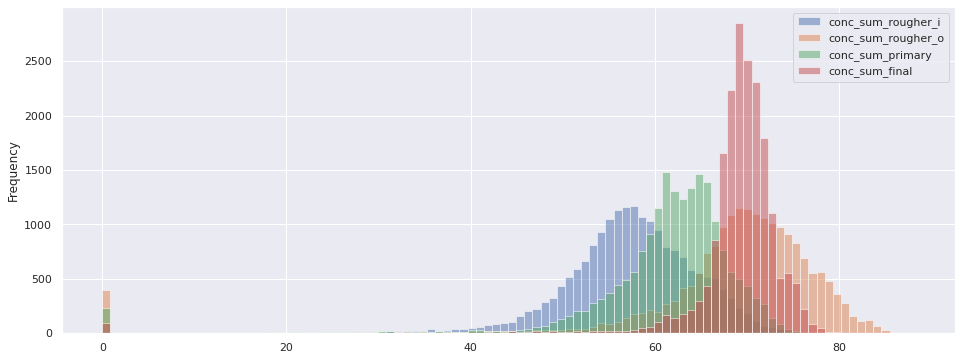

In [63]:
conc_df[['conc_sum_rougher_i', 'conc_sum_rougher_o',
                'conc_sum_primary', 'conc_sum_final']].plot.hist(bins=100, alpha=0.5, figsize=(16, 6))

В суммарных данных много нулевых или близких к нулю значений. Нужно избавиться от наблюдений с такими аномалиями, чтобы они не повлияли на качество модели.

In [64]:
#создадим датасет с аномальными наблюдениями
anom_df = (conc_df[['conc_sum_rougher_i',
                    'conc_sum_rougher_o',
                    'conc_sum_primary',
                    'conc_sum_final']]
           .copy()
           .query('conc_sum_rougher_i == 0\
                  or conc_sum_rougher_o == 0\
                  or conc_sum_primary == 0\
                  or conc_sum_final == 0')
           .fillna(0))

In [65]:
anom_df.head()

,conc_sum_rougher_i,conc_sum_rougher_o,conc_sum_primary,conc_sum_final
date,,,,
2016-01-15 19:00:00,56.005644,62.930764,0.000000,64.546766
2016-01-15 22:00:00,56.038252,62.225893,0.000000,64.554911
2016-01-16 06:00:00,57.764677,62.283147,0.000000,63.765751
2016-01-16 21:00:00,58.602038,0.000000,74.992510,66.175996
2016-01-16 22:00:00,59.921613,0.000000,75.187102,66.794250


In [66]:
test_df = test_df.join(anom_df)

In [67]:
test_df.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery,conc_sum_rougher_i,conc_sum_rougher_o,conc_sum_primary,conc_sum_final
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421,NaN,NaN,NaN,NaN
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657,NaN,NaN,NaN,NaN
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756,NaN,NaN,NaN,NaN
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111

In [68]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [69]:
test_df[['conc_sum_rougher_i', 'conc_sum_rougher_o', 'conc_sum_primary', 'conc_sum_final']]\
= (test_df[['conc_sum_rougher_i', 'conc_sum_rougher_o', 'conc_sum_primary', 'conc_sum_final']]
                                                                    .fillna(-1))

In [70]:
test_df = test_df.query('conc_sum_rougher_i == -1 and conc_sum_rougher_o\
                        == -1  and conc_sum_primary == -1 and conc_sum_final == -1')

<AxesSubplot:ylabel='Frequency'>

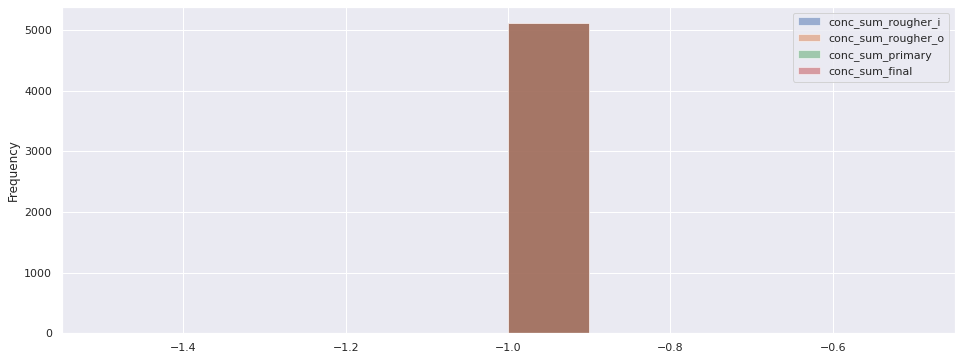

In [71]:
#проверим, что все выполнилось правильно - значением всех признаков должно быть -1
test_df[['conc_sum_rougher_i', 'conc_sum_rougher_o',
                'conc_sum_primary', 'conc_sum_final']].plot.hist(bins=10, alpha=0.5, figsize=(16, 6))

In [72]:
# Убираем аномальные данные из теста
test_df.drop(['conc_sum_rougher_i', 'conc_sum_rougher_o',
                'conc_sum_primary', 'conc_sum_final'], axis='columns', inplace=True)

In [73]:
train_df = train_df.join(anom_df)

train_df[['conc_sum_rougher_i', 'conc_sum_rougher_o', 'conc_sum_primary', 'conc_sum_final']]\
            = (train_df[['conc_sum_rougher_i', 'conc_sum_rougher_o', 'conc_sum_primary', 'conc_sum_final']]
                                                                    .fillna(-1))

train_df = train_df.query('conc_sum_rougher_i == -1 and conc_sum_rougher_o == -1\
                            and conc_sum_primary == -1 and conc_sum_final == -1')

<AxesSubplot:ylabel='Frequency'>

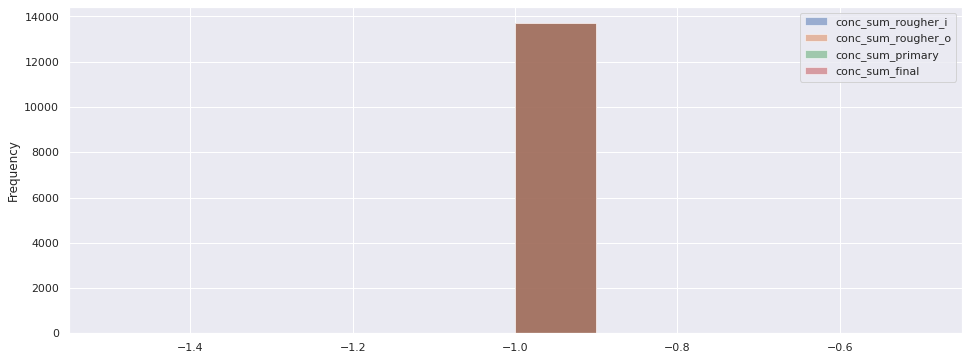

In [74]:
train_df[['conc_sum_rougher_i', 'conc_sum_rougher_o',\
                'conc_sum_primary', 'conc_sum_final']].plot.hist(bins=10, alpha=0.5, figsize=(16, 6))

In [75]:
train_df.drop(['conc_sum_rougher_i', 'conc_sum_rougher_o',\
               'conc_sum_primary', 'conc_sum_final'], axis='columns', inplace=True)

In [76]:
# Уберем NaN-значения
test_df.dropna(inplace=True)
train_df.dropna(inplace=True)

In [77]:
display(train_df.shape)
display(test_df.shape)

(13725, 54)

(5123, 54)

Выборки обработаны,  перейдем к построению моделей.

## Модель

In [78]:
# Посмотрим на обучающую выборку
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13725 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13725 non-null  float64
 1   primary_cleaner.input.sulfate               13725 non-null  float64
 2   primary_cleaner.input.depressant            13725 non-null  float64
 3   primary_cleaner.input.feed_size             13725 non-null  float64
 4   primary_cleaner.input.xanthate              13725 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13725 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13725 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13725 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13725 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13725 non-nu

В целевых признаках пропусков нет.

Напишем функции для вычисления метрики финальной метрики sMAPE - симметричное среднее абсолютное процентное отклонение

In [79]:
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    return (error / scale).mean()*100 

In [80]:
def smape_weighted(rougher_smape, final_smape):
    result = 0.25 * rougher_smape + 0.75 * final_smape
    return result 

Подготовим предикторы и целевые признаки для обучающей выборки

In [81]:
target_rougher_train = train_df['rougher.output.recovery'].reset_index(drop=True)
target_final_train = train_df['final.output.recovery'].reset_index(drop=True)
features_train = train_df.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
features_train = pd.DataFrame(features_train).reset_index(drop=True)

In [82]:
print(target_rougher_train.shape)
print(target_final_train.shape)
print(features_train.shape)

(13725,)
(13725,)
(13725, 52)


In [83]:
# Масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

In [84]:
features_train.shape

(13725, 52)

In [85]:
scorer = make_scorer(smape, greater_is_better=False)

In [86]:
# Ввел значение для разбиения выбрки кросс-валидации
kfold = KFold(n_splits=3)

In [87]:
model_dtr = DecisionTreeRegressor(random_state=SEED)
score_cross_val_dtr = cross_val_score(model_dtr, features_train, target_rougher_train, cv=kfold, scoring=scorer)

In [88]:
print(score_cross_val_dtr.mean())

-9.086133582951483


In [89]:
# Проверим кроссвалидацией мдель линейной регрессии
model_lr = LinearRegression()
score_cross_val_lr = cross_val_score(model_lr, features_train, target_rougher_train, cv=kfold, scoring=scorer)

In [90]:
print(score_cross_val_lr.mean())

-10.381735746924527


In [91]:
# Проверим модель от Яндекса CatBoost 
model_cb = CatBoostRegressor(iterations=2, learning_rate=1, depth=3)
score_cross_val_cb = cross_val_score(model_cb, features_train, target_rougher_train, cv=kfold, scoring=scorer)



0:	learn: 5.2587366	total: 57.4ms	remaining: 57.4ms
1:	learn: 4.8617789	total: 66ms	remaining: 0us
0:	learn: 6.5158555	total: 9.71ms	remaining: 9.71ms
1:	learn: 6.1675210	total: 17.4ms	remaining: 0us
0:	learn: 6.2003175	total: 9.1ms	remaining: 9.1ms
1:	learn: 5.7999344	total: 16.5ms	remaining: 0us


In [92]:
print(score_cross_val_cb.mean())

-8.26119969457693


**Проверка модели случайного леса**

In [93]:
parametrs = {'max_depth':range(1, 5, 1), 'n_estimators': [30,100]}

In [94]:
# подберем лучшие параметры для модели случайного леса

model_rf = RandomForestRegressor(random_state=SEED)
CV_rf = GridSearchCV(model_rf, param_grid=parametrs, scoring=scorer, cv=kfold, n_jobs= -1)
CV_rf.fit(features_train, target_rougher_train)
print(CV_rf.best_params_)
print(CV_rf.best_score_)

{'max_depth': 2, 'n_estimators': 30}
-7.836598598944453


Случайны лес показал лучший результат. Подготовим предикты и целевой признак для тестовой выборки.

In [95]:
parametrs = {'max_depth':range(1, 5, 1), 'n_estimators': [30,100]}

In [96]:
# подберем лучшие параметры в модели случайного леча для таргетов final

model_rf = RandomForestRegressor(random_state=SEED)
CV_rf = GridSearchCV(model_rf, param_grid=parametrs, scoring=scorer, cv=kfold, n_jobs= -1)
CV_rf.fit(features_train, target_final_train)
print(CV_rf.best_params_)
print(CV_rf.best_score_)

{'max_depth': 2, 'n_estimators': 100}
-10.137935586741781


Для таргетов rougher и final лучшие параметры одинаковы. 

In [87]:
# Выделим таргеты и предикторы в тестовой выборке
target_rougher_test = test_df['rougher.output.recovery'].reset_index(drop=True)
target_final_test = test_df['final.output.recovery'].reset_index(drop=True)

features_test = test_df.drop(['final.output.recovery', 'rougher.output.recovery'], axis='columns')
features_test = pd.DataFrame(features_test).reset_index(drop=True)

In [94]:
print(target_rougher_test.shape)
print(target_final_test.shape)
print(features_test.shape)

(5123,)
(5123,)
(5123, 52)


In [93]:
features_test = scaler.transform(features_test)

In [95]:
# Получим предсказания на обученной модели случайного леса
model_rf_rougher = RandomForestRegressor(random_state=SEED, max_depth=2, n_estimators=30)
model_rf_final = RandomForestRegressor(random_state=SEED, max_depth=2, n_estimators=100)

In [96]:
rf_rougher = model_rf_rougher.fit(features_train, target_rougher_train)
rf_final = model_rf_final.fit(features_train, target_final_train)

In [97]:
rf_predictions_rougher = rf_rougher.predict(features_test)
rf_predictions_final = rf_final.predict(features_test)

Посчитаем sMAPE для флотации, финального этапа и итоговый. 

In [98]:
smape_rougher = smape(target_rougher_test, rf_predictions_rougher)
smape_final = smape(target_final_test, rf_predictions_final)
print('sMAPE флотации:', smape_rougher)
print('sMAPE финального этапа:', smape_final)
print('sMAPE итоговый:', smape_weighted(smape_rougher, smape_final))

sMAPE флотации: 4.707791469507439
sMAPE финального этапа: 7.72538482072787
sMAPE итоговый: 6.970986482922763


- На данном этапе написали функцию sMAPE
- Выделили предикторы и целевые признаки
- Масштабировали данные
- Подобрали оптимальную модель и протестировали

**Проверка модели на адекватность**

In [99]:
# DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_rougher_train)
dummy_regr.predict(features_test)

dummy_regr_1 = DummyRegressor(strategy="mean")
dummy_regr_1.fit(features_train, target_final_train)
dummy_regr_1.predict(features_test)

smape_r = smape(target_rougher_test, (dummy_regr.predict(features_test)))
smape_f = smape(target_final_test, (dummy_regr_1.predict(features_test)))

In [100]:
print(smape_r)
print(smape_f)
print(smape_weighted(smape_r, smape_f))

5.364780952068203
8.582525522731439
7.77808938006563


Модель проверена, средняя работает лучше. Но преполагаю что 8.08 является допустимым уровнем в проекте, так находится рядом с базисом. 

<div class="alert alert-block alert-warning">
    <font size=4>Вывод</font>   
    
1. Изучили технологический процесс с параметрами добычи и очистки золота    
2. Загрузили и проверили сырые данные    
3. Обработали данные  
    --убрали дубликаты  
    --изучили недостающие признаки в тестовой выборке  
    --удалили пропуски в целевых признаках
4. Проверили изменения концентрации металлов в ходе технологического процесса
5. Сравнили распределения размеров гранул. Они совпадают с небольшими погрешностями
6. Исследовали суммароную концентрацию металлов в ходе тех.процесса. Выявили и избавились от аномалий.
7. На этапе построения моделей, подготовили функцию для расчета sMAPE, обучили и протестировали лучшую модель Случай ного леса. Подобрали лучшие параметры и проверили на адекватность.
    - подготовили прототим модели машинного обучения для "Цифры"
</div>